In [3]:
#Import libraries 
import pandas as pd
import numpy as np 
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xinyihe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv("employee_reviews.csv")
df.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [5]:
company = list(df['company'].value_counts().keys())
company

['amazon', 'microsoft', 'apple', 'google', 'facebook', 'netflix']

In [6]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop = list(stop)+["work","company","people","get","working"]

In [7]:
def common(company, n, s):
    dict1 = dict()
    for line in df[df['company'] == company][s]:
        for word in line.split():
            word  = word.lower()
            if word in stop or word == "-" or word == company:
                continue
            if (word not in dict1):
                dict1[word] = 0
            dict1[word] += 1
    list1 = sorted([(dict1[i],i) for i in dict1],reverse = True)
    return [v for u,v in list1[:n]]

In [8]:
for i in company:
    print(i, common(i,3, "pros"))

amazon ['good', 'great', 'pay']
microsoft ['great', 'good', 'benefits']
apple ['great', 'good', 'benefits']
google ['great', 'good', 'smart']
facebook ['great', 'good', 'culture']
netflix ['great', 'good', 'free']


In [9]:
for i in company:
    print(i,common(i,3, "cons"))

amazon ['management', 'time', 'hours']
microsoft ['management', 'many', 'much']
apple ['management', 'retail', 'time']
google ['many', 'hard', 'big']
facebook ['really', 'hard', 'much']
netflix ['management', 'time', 'like']


In [10]:
def wordplot(n,s):
    fig,axe = plt.subplots(1,6,figsize=(25, 5))
    fig.suptitle(s, fontsize=24)
    for i in range(6):
        comment_words = ''
        for w in common(company[i],n,s):
            comment_words += w + " "
        comment_words

        wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', 
                        min_font_size = 10).generate(comment_words) 

        # plot the WordCloud image                        
        axe[i].imshow(wordcloud) 
        axe[i].axis("off") 
        axe[i].set_title(company[i])


        axe[i].plot() 

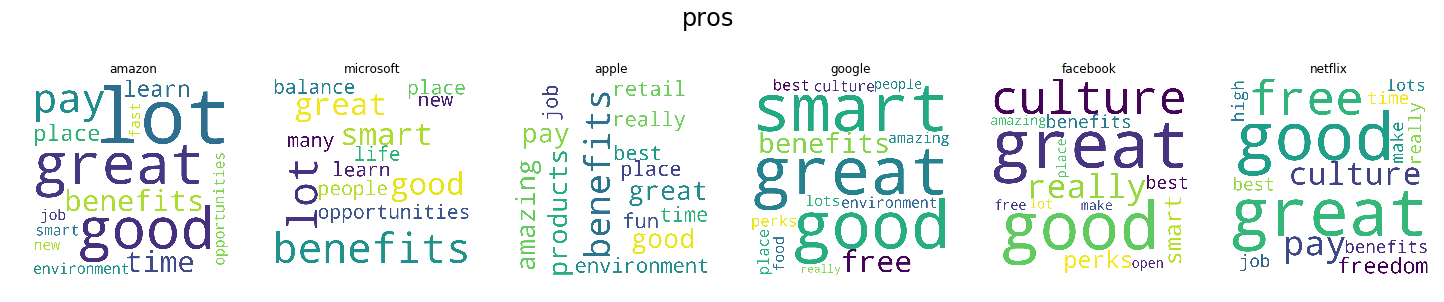

In [11]:
wordplot(15,"pros")

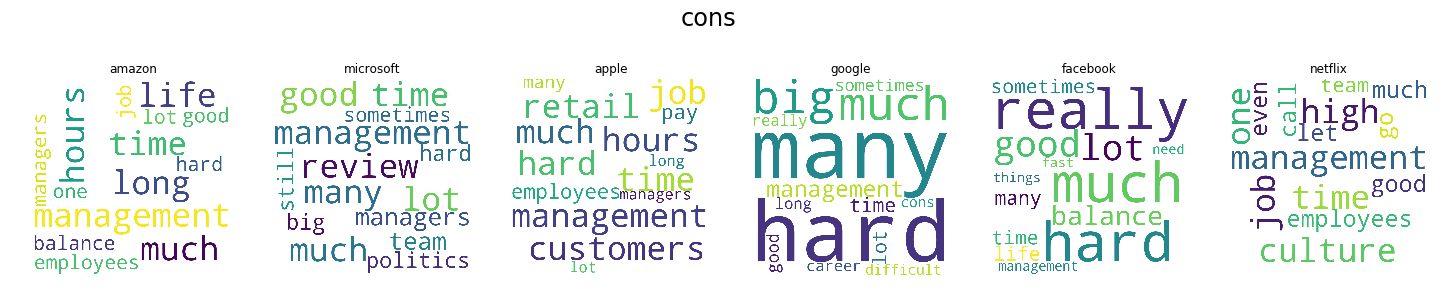

In [12]:
wordplot(15,"cons")